In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter


In [46]:
df=pd.read_csv("../dataset/fetal_health.csv")

In [47]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [48]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [49]:
df.shape

(2126, 22)

In [50]:
len(df)

2126

In [51]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [53]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [54]:
df["fetal_health"] .value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

DATA VISUALIZATION

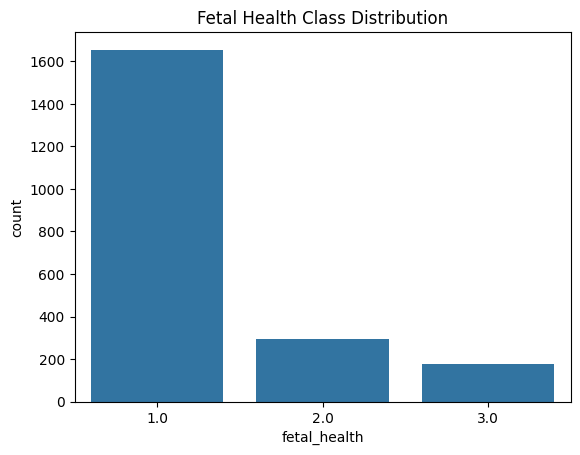

In [55]:
# CLASS DISTRIBUTION PLOT
sns.countplot(x='fetal_health', data=df)
plt.title("Fetal Health Class Distribution")
plt.show()


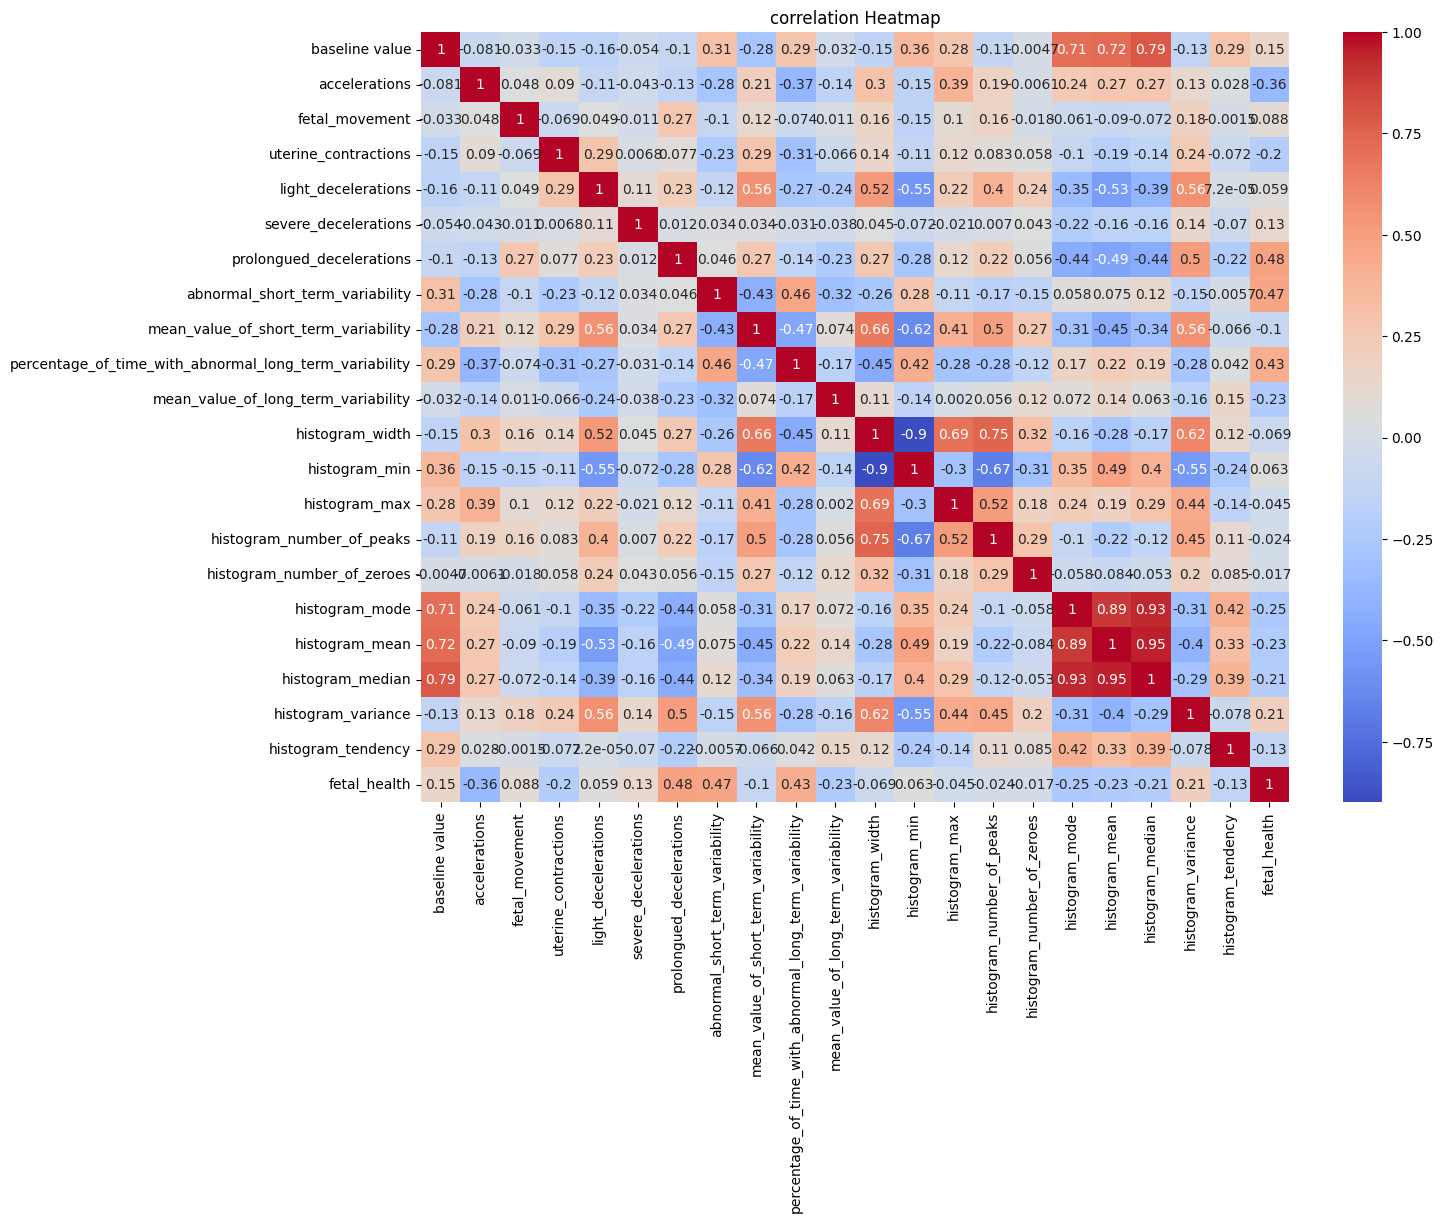

In [56]:
# CORRELATION HEATMAP
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, 
 cmap='coolwarm')           
plt.title("correlation Heatmap")
plt.show()

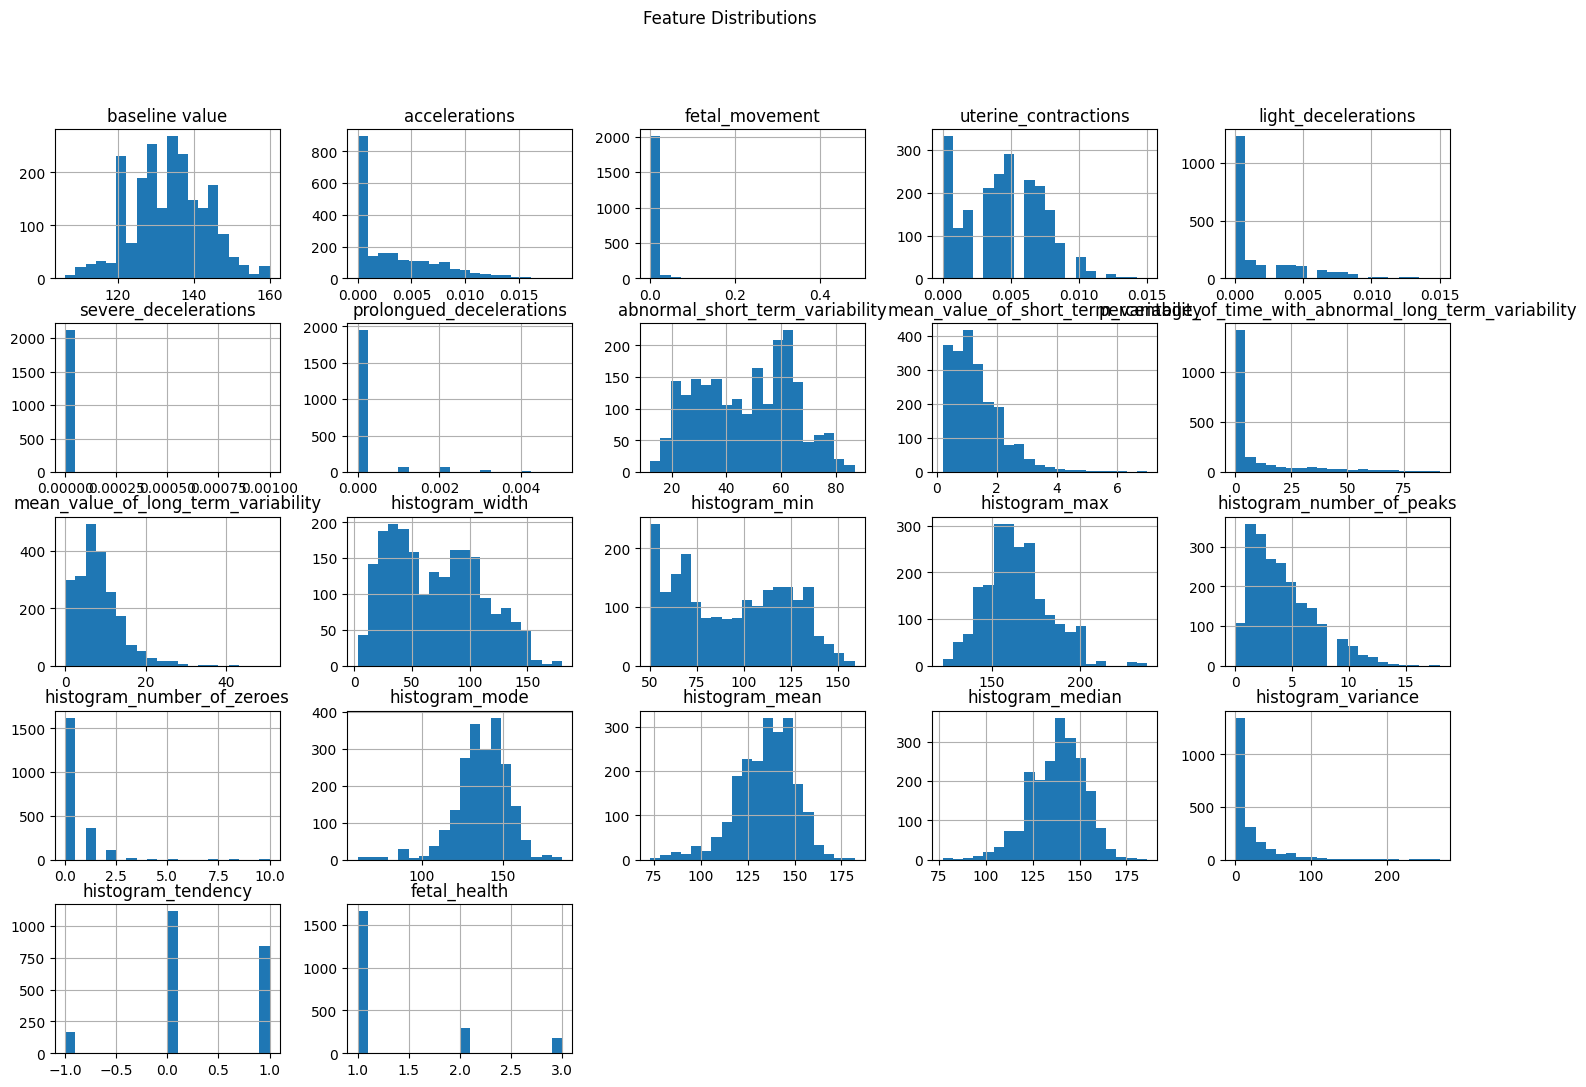

In [57]:
df.hist(figsize=(18, 12), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


C:\Users\Victus\AppData\Local\Temp\ipykernel_16228\3320125713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr['fetal_health'].drop('fetal_health').abs().sort_values(ascending=False),


<function matplotlib.pyplot.show(close=None, block=None)>

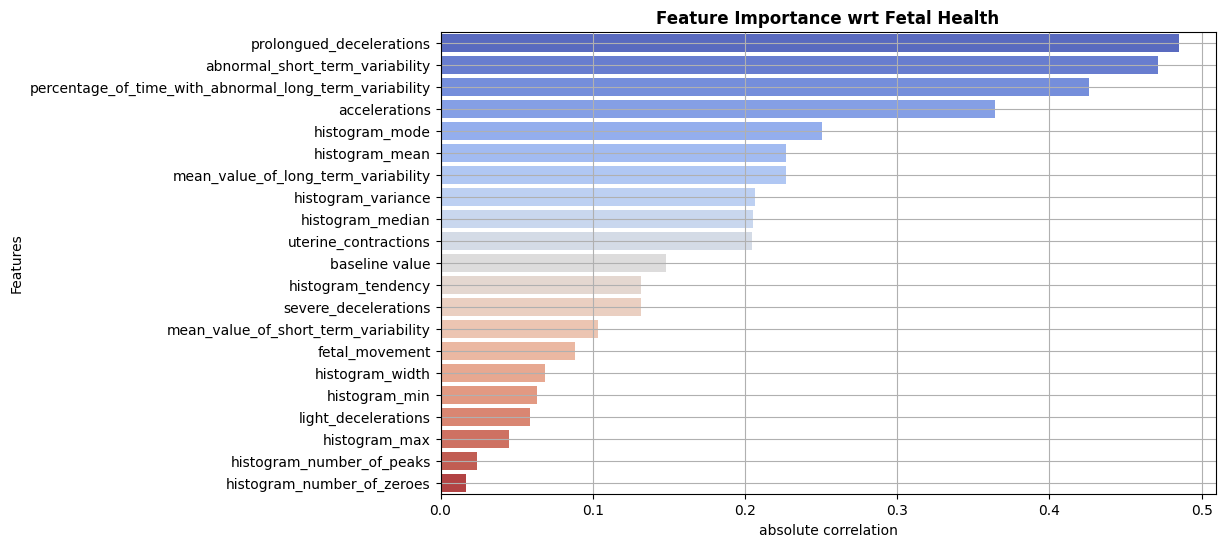

In [58]:
# Correlation matrix
corr = df. corr()

# Plot correlation with fetal_health
plt.figure(figsize=(10,6))
sns.barplot(x=corr['fetal_health'].drop('fetal_health').abs().sort_values(ascending=False),
y=corr['fetal_health'].drop('fetal_health').abs().sort_values(ascending=False).index, palette='coolwarm') 
plt.title('Feature Importance wrt Fetal Health',weight='bold')
plt.xlabel('absolute correlation')
plt.ylabel('Features')
plt.grid(True)
plt.show                                                            

C:\Users\Victus\AppData\Local\Temp\ipykernel_16228\493575345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health',y=feature, data=df, palette='viridis')


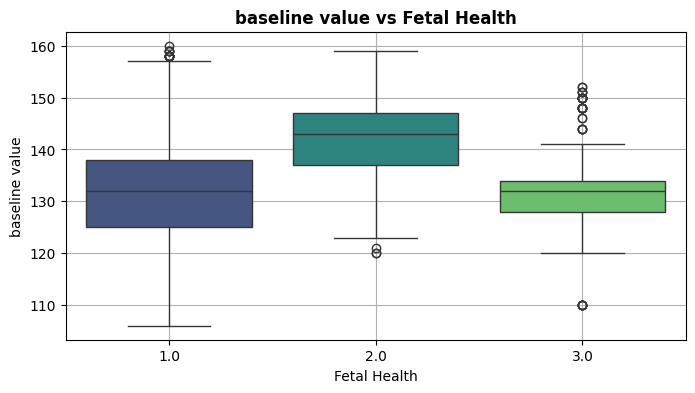

C:\Users\Victus\AppData\Local\Temp\ipykernel_16228\493575345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health',y=feature, data=df, palette='viridis')


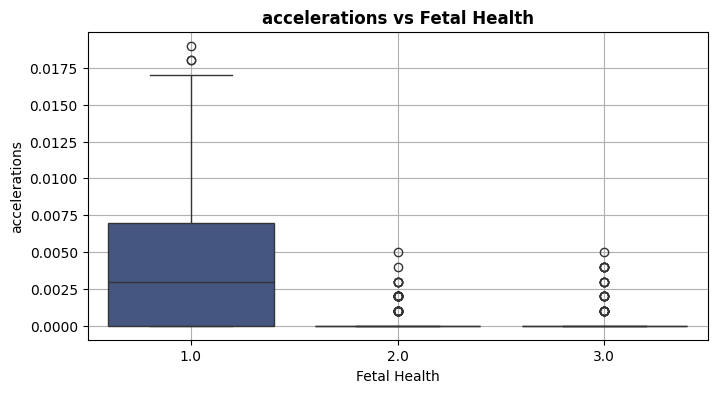

C:\Users\Victus\AppData\Local\Temp\ipykernel_16228\493575345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health',y=feature, data=df, palette='viridis')


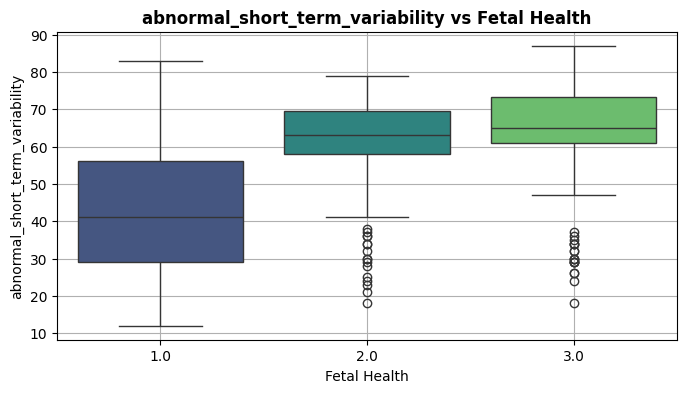

In [59]:
Important_features = ['baseline value','accelerations','abnormal_short_term_variability']
for feature in Important_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='fetal_health',y=feature, data=df, palette='viridis')
    plt.title(f'{feature} vs Fetal Health', weight='bold')
    plt.xlabel('Fetal Health')
    plt.ylabel(feature)
    
    plt.grid(True)
    plt.show()

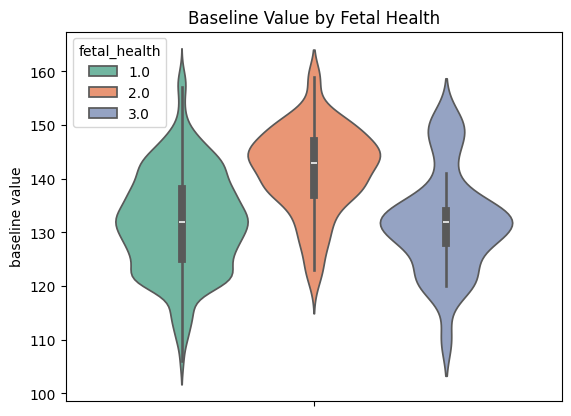

In [60]:
sns.violinplot(y='baseline value',hue='fetal_health', data=df, palette="Set2")
plt.title("Baseline Value by Fetal Health")
plt.show()

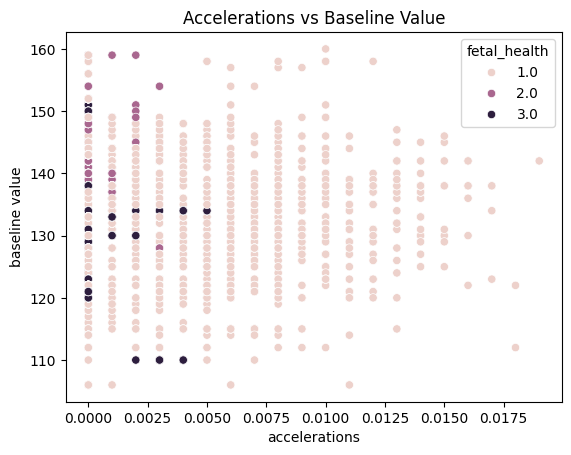

In [61]:
sns.scatterplot(x='accelerations', y='baseline value', hue='fetal_health', data=df)
plt.title("Accelerations vs Baseline Value")
plt.show()

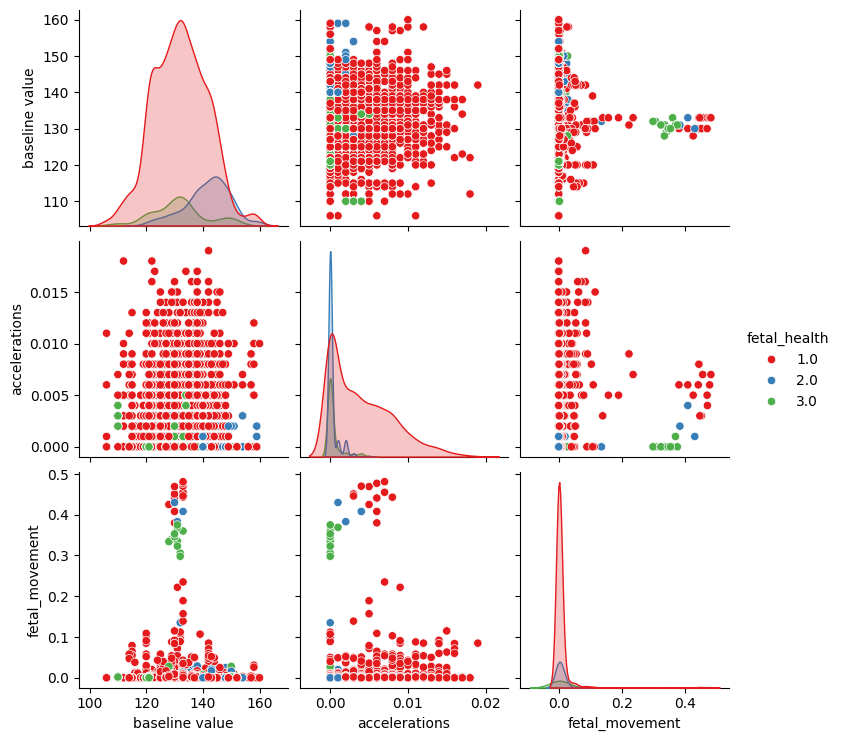

In [62]:
sns.pairplot(df[['baseline value', 'accelerations', 'fetal_movement', 'fetal_health']], hue='fetal_health',palette="Set1")
plt.show()

In [63]:
x = df.drop('fetal_health', axis=1)
y = df["fetal_health"].astype(int) - 1   #  Convert to 0,1,2 


Splitting the data

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [65]:
# Apply SMOTE on Training Data
print("Before SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 1323, 1: 236, 2: 141})
After SMOTE: Counter({2: 1323, 0: 1323, 1: 1323})


Train RandomForest Model

In [66]:
model_1=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=4)
model_1.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=4, random_state=42)

In [67]:
y_pred = model_1.predict(x_test)

C:\Users\Victus\AppData\Local\Temp\ipykernel_16228\4239432511.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


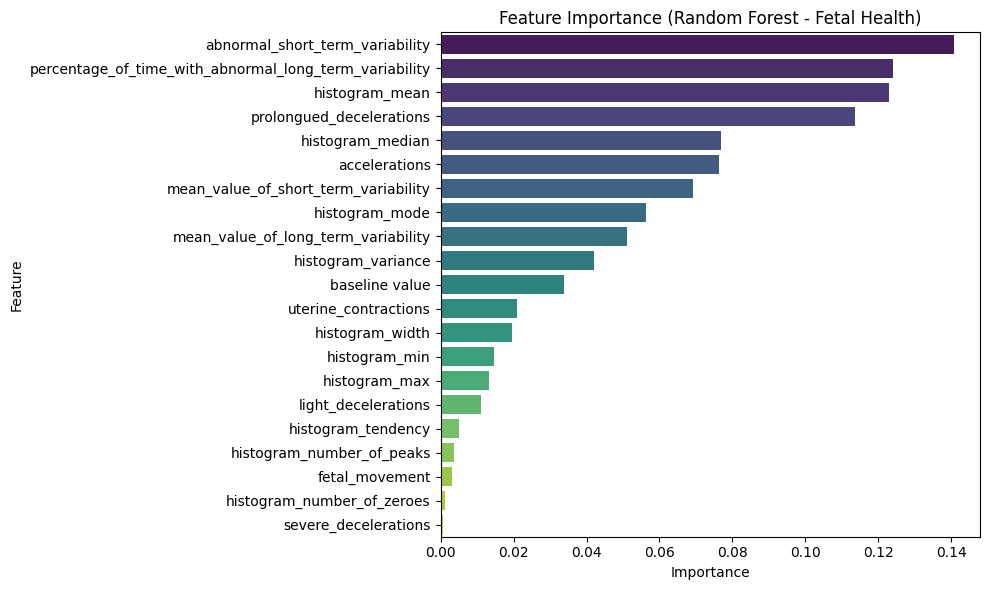

In [68]:
# Get feature importances
importances = model_1.feature_importances_
feature_names = x.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest - Fetal Health)')
plt.tight_layout()
plt.show()

In [69]:
# EVALUATION METRICS
print("CONFUSION MATRIX!")
print(confusion_matrix(y_test,y_pred))
print("CLASSIFICATION REPORT!")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

CONFUSION MATRIX!
[[296  31   5]
 [  8  49   2]
 [  0   7  28]]
CLASSIFICATION REPORT!
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       332
           1       0.56      0.83      0.67        59
           2       0.80      0.80      0.80        35

    accuracy                           0.88       426
   macro avg       0.78      0.84      0.80       426
weighted avg       0.90      0.88      0.88       426

Accuracy Score: 0.8755868544600939


Train Logisticregression Model

In [70]:
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(x_train_resampled,y_train_resampled)

c:\Users\Victus\Desktop\Fatal_Health\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [71]:
y_pred = model_2.predict(x_test)

In [72]:
# EVALUATION METRICS
print("CONFUSION MATRIX!")
print(confusion_matrix(y_test,y_pred))
print("CLASSIFICATION REPORT!")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

CONFUSION MATRIX!
[[262  59  11]
 [ 10  44   5]
 [  0   6  29]]
CLASSIFICATION REPORT!
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       332
           1       0.40      0.75      0.52        59
           2       0.64      0.83      0.72        35

    accuracy                           0.79       426
   macro avg       0.67      0.79      0.71       426
weighted avg       0.86      0.79      0.81       426

Accuracy Score: 0.7863849765258216


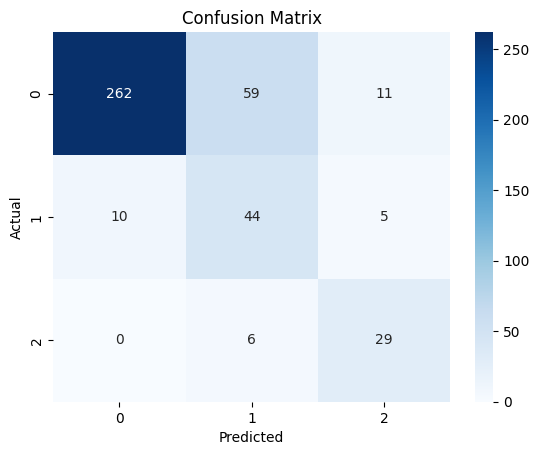

In [73]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Train DecisionTreeClassifier Model

In [74]:
model_3=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)
model_3.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [75]:
y_pred=model_3.predict(x_test)

In [76]:
# EVALUATION METRICS
print("CONFUSION MATRIX!")
print(confusion_matrix(y_test,y_pred))
print("CLASSIFICATION REPORT!")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

CONFUSION MATRIX!
[[308  21   3]
 [ 10  46   3]
 [  4   1  30]]
CLASSIFICATION REPORT!
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       332
           1       0.68      0.78      0.72        59
           2       0.83      0.86      0.85        35

    accuracy                           0.90       426
   macro avg       0.82      0.85      0.84       426
weighted avg       0.91      0.90      0.90       426

Accuracy Score: 0.9014084507042254


Train Support Vector Classifier Model

In [77]:
model_4=SVC(kernel='rbf',gamma='scale')
model_4.fit(x_train_resampled,y_train_resampled)

SVC()

In [78]:
y_pred=model_4.predict(x_test)

In [79]:
# EVALUATION METRICS
print("CONFUSION MATRIX!")
print(confusion_matrix(y_test,y_pred))
print("CLASSIFICATION REPORT!")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

CONFUSION MATRIX!
[[269  50  13]
 [ 10  45   4]
 [  0   8  27]]
CLASSIFICATION REPORT!
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       332
           1       0.44      0.76      0.56        59
           2       0.61      0.77      0.68        35

    accuracy                           0.80       426
   macro avg       0.67      0.78      0.71       426
weighted avg       0.86      0.80      0.82       426

Accuracy Score: 0.8004694835680751


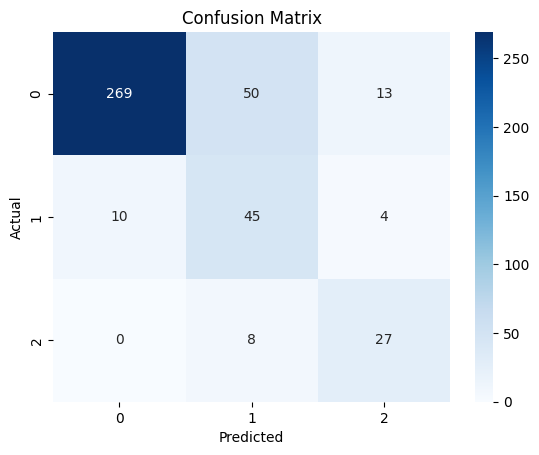

In [80]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [81]:
model_5=XGBClassifier(eval_metric='mlogloss', random_state=42)
model_5.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [82]:
y_pred = model_5.predict(x_test)

In [83]:
# EVALUATION METRICS
print("CONFUSION MATRIX!")
print(confusion_matrix(y_test,y_pred))
print("CLASSIFICATION REPORT!")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

CONFUSION MATRIX!
[[323   8   1]
 [  9  47   3]
 [  3   1  31]]
CLASSIFICATION REPORT!
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       332
           1       0.84      0.80      0.82        59
           2       0.89      0.89      0.89        35

    accuracy                           0.94       426
   macro avg       0.90      0.89      0.89       426
weighted avg       0.94      0.94      0.94       426

Accuracy Score: 0.9413145539906104


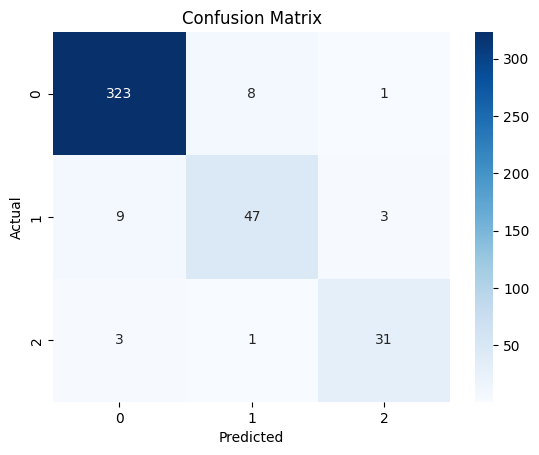

In [84]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


 Random Forest 
Accuracy: 0.8755868544600939
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       332
           1       0.56      0.83      0.67        59
           2       0.80      0.80      0.80        35

    accuracy                           0.88       426
   macro avg       0.78      0.84      0.80       426
weighted avg       0.90      0.88      0.88       426

Confusion Matrix:
[[296  31   5]
 [  8  49   2]
 [  0   7  28]]


c:\Users\Victus\Desktop\Fatal_Health\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Logistic Regression 
Accuracy: 0.7863849765258216
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       332
           1       0.40      0.75      0.52        59
           2       0.64      0.83      0.72        35

    accuracy                           0.79       426
   macro avg       0.67      0.79      0.71       426
weighted avg       0.86      0.79      0.81       426

Confusion Matrix:
[[262  59  11]
 [ 10  44   5]
 [  0   6  29]]

 Decision Tree 
Accuracy: 0.9014084507042254
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       332
           1       0.68      0.78      0.72        59
           2       0.83      0.86      0.85        35

    accuracy                           0.90       426
   macro avg       0.82      0.85      0.84       426
weighted avg       0.91      0.90      0.90       426

Confusion Matrix:
[[308  21   

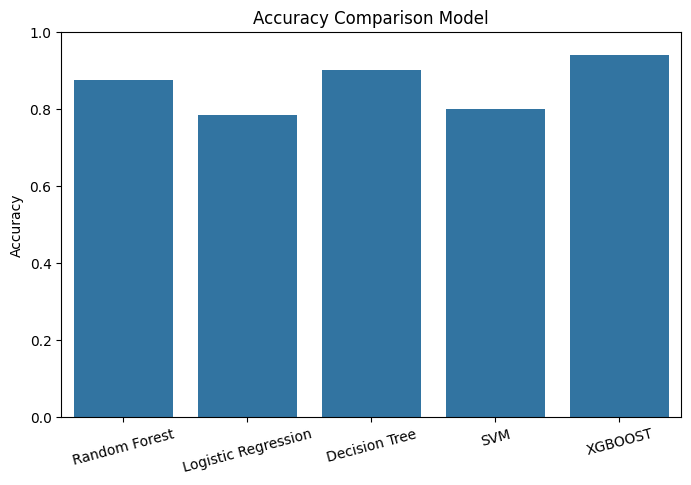

In [85]:
models = {"Random Forest": model_1,"Logistic Regression": model_2,"Decision Tree": model_3,"SVM": model_4,"XGBOOST":model_5}
results = {}
for name, model in models.items():
    model.fit(x_train_resampled, y_train_resampled)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n {name} ")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


# VISUALIZE ACCURACY
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Accuracy Comparison Model')
plt.xticks(rotation=15)
plt.show()

Out of all models


XGBoost is the best choice with 94.1% accuracy, and the highest precision, recall, and F1-score across all classes, especially for critical class 2 (danger).
It outperforms all other models in both macro and weighted averages, ensuring balanced and accurate predictions.
Ideal for medical use where recall for dangerous cases is crucial and misclassification is costly.

In [112]:
input_data = (146.0,0.0,0.0,0.001,0.0,0.0,0.0,53.0,0.5,32.0,8.2,27.0,136.0,163.0,2.0,1.0,160.0,156.0,158.0,2.0,1.0)
input_data_as_numpy_array = np.asarray(input_data)
print (input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

prediction = model_5.predict(input_data_reshaped)
print(prediction)

if(prediction == 0):
    print("Baby is Healthy")
elif(prediction == 1):
    print("Slight abnormality detected. Baby is not fully healthy ")   
elif(prediction == 2):
    print("Baby is in danger! Immediate medical attention may be required")     
else:
    print("Unknown  Prediction")    



[1.46e+02 0.00e+00 0.00e+00 1.00e-03 0.00e+00 0.00e+00 0.00e+00 5.30e+01
 5.00e-01 3.20e+01 8.20e+00 2.70e+01 1.36e+02 1.63e+02 2.00e+00 1.00e+00
 1.60e+02 1.56e+02 1.58e+02 2.00e+00 1.00e+00]
[[1.46e+02 0.00e+00 0.00e+00 1.00e-03 0.00e+00 0.00e+00 0.00e+00 5.30e+01
  5.00e-01 3.20e+01 8.20e+00 2.70e+01 1.36e+02 1.63e+02 2.00e+00 1.00e+00
  1.60e+02 1.56e+02 1.58e+02 2.00e+00 1.00e+00]]
[1]
Slight abnormality detected. Baby is not fully healthy 


In [87]:
import joblib

In [88]:
fileName = "../save_models/fetal_health.joblib"

In [89]:
joblib.dump(model_5,fileName)

['../save_models/fetal_health.joblib']

In [91]:
loaded_model = joblib.load(fileName)

In [113]:
input_data = (146.0,0.0,0.0,0.001,0.0,0.0,0.0,53.0,0.5,32.0,8.2,27.0,136.0,163.0,2.0,1.0,160.0,156.0,158.0,2.0,1.0)
input_data_as_numpy_array = np.asarray(input_data)
print (input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction == 0):
    print("Baby is Healthy")
elif(prediction == 1):
    print("Slight abnormality detected. Baby is not fully healthy ")   
elif(prediction == 2):
    print("Baby is in danger! Immediate medical attention may be required")     
else:
    print("Unknown  Prediction")    


[1.46e+02 0.00e+00 0.00e+00 1.00e-03 0.00e+00 0.00e+00 0.00e+00 5.30e+01
 5.00e-01 3.20e+01 8.20e+00 2.70e+01 1.36e+02 1.63e+02 2.00e+00 1.00e+00
 1.60e+02 1.56e+02 1.58e+02 2.00e+00 1.00e+00]
[[1.46e+02 0.00e+00 0.00e+00 1.00e-03 0.00e+00 0.00e+00 0.00e+00 5.30e+01
  5.00e-01 3.20e+01 8.20e+00 2.70e+01 1.36e+02 1.63e+02 2.00e+00 1.00e+00
  1.60e+02 1.56e+02 1.58e+02 2.00e+00 1.00e+00]]
[1]
Slight abnormality detected. Baby is not fully healthy 
